In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_usa=pd.read_csv("D:/projects/Sentiment_Analysis(YouTube_Dataset)(NLP_WordCloud_ TextBlob)/USvideos.csv")
df_ca=pd.read_csv("D:/projects/Sentiment_Analysis(YouTube_Dataset)(NLP_WordCloud_ TextBlob)/CAvideos.csv")
df_de=pd.read_csv("D:/projects/Sentiment_Analysis(YouTube_Dataset)(NLP_WordCloud_ TextBlob)/DEvideos.csv")
df_fr=pd.read_csv("D:/projects/Sentiment_Analysis(YouTube_Dataset)(NLP_WordCloud_ TextBlob)/FRvideos.csv")
df_gb=pd.read_csv("D:/projects/Sentiment_Analysis(YouTube_Dataset)(NLP_WordCloud_ TextBlob)/GBvideos.csv")

In [3]:
#In the dataset, the Trending Date and Published Time are not in the Unix date-time format. Let's fix this first.
df_usa['trending_date'] = pd.to_datetime(df_usa['trending_date'], format='%y.%d.%m')
df_usa['publish_time'] = pd.to_datetime(df_usa['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# separates date and time into two columns from 'publish_time' column

df_usa.insert(4, 'publish_date', df_usa['publish_time'].dt.date)#Series.dt.dateReturns (namely, the date part of Timestamps without timezone information).
df_usa['publish_time'] = df_usa['publish_time'].dt.time
df_usa['publish_date']=pd.to_datetime(df_usa['publish_date']) #pandas.to_datetime Convert argument to datetime.

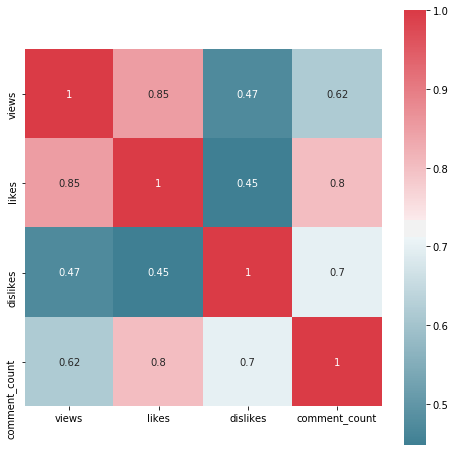

In [4]:
#To see the correlation between the likes, dislikes, comments, and views lets plot a correlation matrix
columns_show=['views', 'likes', 'dislikes', 'comment_count']
f, ax = plt.subplots(figsize=(8, 8))
corr = df_usa[columns_show].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)#seaborn.heatmap Plot rectangular data as a color-encoded matrix.  draw the heatmap

#In the above matrix, for USA dataset, the columns with :-
#    High Correlation - Views and Likes,, Comment_count and Dislikes
#    Medium Correlation - Views and Dislikes, Views and Comment_Count, Likes and Comment_Count
#    Low Correlation - Likes and Dislike

In [5]:
#Since, a video could be in trending for several days. There might be multiple rows of a particular video.
#In order to calculate the total Views, Comments, Likes, Dislikes of a video, we need to groupby with video_id.
#The below script will give you the total no. of views/comments/likes, and dislikes of a video.

usa_video_views=df_usa.groupby(['video_id'])['views'].agg('sum')
usa_video_likes=df_usa.groupby(['video_id'])['likes'].agg('sum')
usa_video_dislikes=df_usa.groupby(['video_id'])['dislikes'].agg('sum')
usa_video_comment_count=df_usa.groupby(['video_id'])['comment_count'].agg('sum')

In [6]:
#To get the numbers of videos on which the 'Comments Disabled/ Rating Disabled/Video Error'.
#We need to remove the duplicates to get the correct numbers otherwise there will be redundancy.

df_usa_single_day_trend=df_usa.drop_duplicates(subset='video_id', keep=False, inplace=False)#implace-works on orignal data(faster)
df_usa_multiple_day_trend= df_usa.drop_duplicates(subset='video_id',keep='first',inplace=False)#since multiple day(keep=first)

frames = [df_usa_single_day_trend, df_usa_multiple_day_trend]
df_usa_without_duplicates=pd.concat(frames)

#DataFrame.describe: Generates descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.
df_usa_comment_disabled=df_usa_without_duplicates[df_usa_without_duplicates['comments_disabled']==True].describe()
df_usa_rating_disabled=df_usa_without_duplicates[df_usa_without_duplicates['ratings_disabled']==True].describe()
df_usa_video_error=df_usa_without_duplicates[df_usa_without_duplicates['video_error_or_removed']==True].describe()

In [7]:
#How many videos were trended only for a single day?

df_usa_single_day_trend.head()#DataFrame.head(n=5) Return the first n rows.

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,2017-11-13,17,02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,2017-11-12,1,18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,2017-11-12,25,21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...
55,8NHA23f7LvU,2017-11-14,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,2017-11-10,24,19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116,236,605,https://i.ytimg.com/vi/8NHA23f7LvU/default.jpg,False,False,False,I think Sarah Millican was very excited for th...
76,IE-xepGLVt8,2017-11-14,Mayo Clinic's first face transplant patient me...,Mayo Clinic,2017-11-10,28,12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896,74,260,https://i.ytimg.com/vi/IE-xepGLVt8/default.jpg,False,False,False,One and a half years after the surgery that tr...


In [8]:
#Videos that were trended for more than 1 day

df_usa_multiple_day_trend.head()

,video_id,trending_date,title,channel_title,publish_date,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


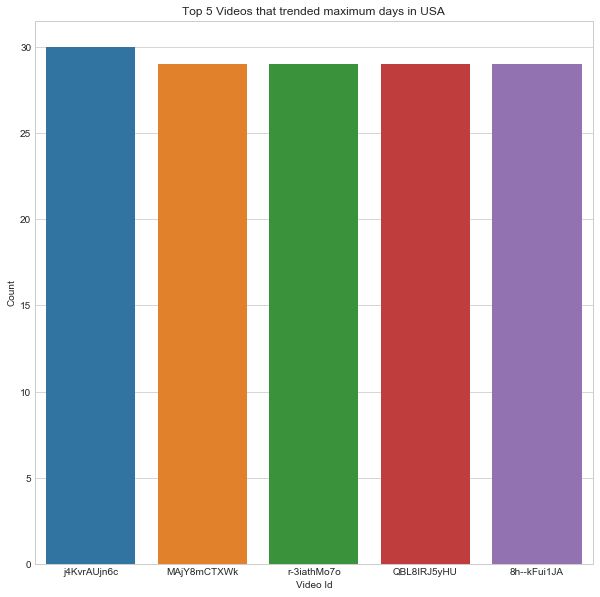

In [9]:
#Which video trended on maximum days and what is the title, likes, dislikes, comments, and views.

df_usa_which_video_trended_maximum_days=df_usa.groupby(by=['video_id'],as_index=False).count().sort_values(by='title',ascending=False).head()

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=df_usa_which_video_trended_maximum_days['video_id'],y=df_usa_which_video_trended_maximum_days['trending_date'], data=df_usa_which_video_trended_maximum_days)
plt.xlabel("Video Id")
plt.ylabel("Count")
plt.title("Top 5 Videos that trended maximum days in USA")

In [10]:
#Video which were trended for maximum days
#The maximum no. of days a video trended is 14 i.e. for 'sXP6vliZIHI' video id.
#Now, the below script gives its likes,dislikes, views, and comments.

df_usa_maximum_views=usa_video_views['sXP6vliZIHI']
df_usa_maximum_likes=usa_video_likes['sXP6vliZIHI']
df_usa_maximum_dislikes=usa_video_dislikes['sXP6vliZIHI']
df_usa_maximum_comment=usa_video_comment_count['sXP6vliZIHI']

c:\users\ankur\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\ankur\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


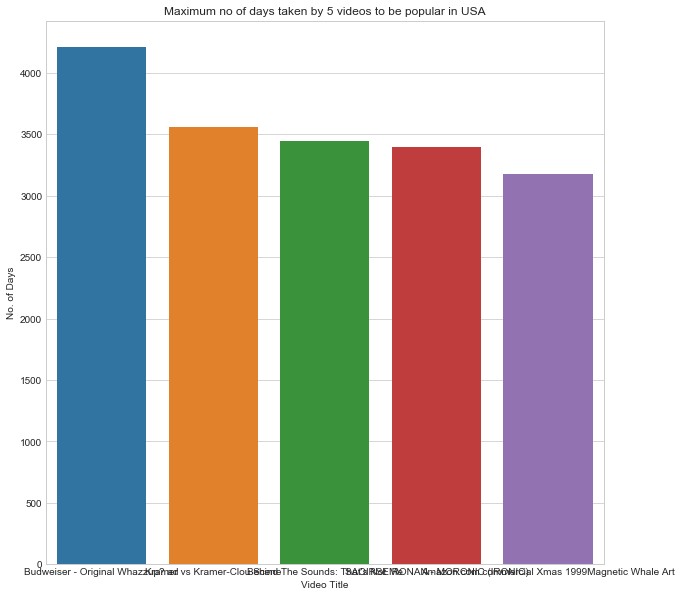

In [11]:
#Which video took maximum no of days to be a Trending Video-
#Now, the below script will calculate the no of days taken by a video to be a Trending Video. 
#The graph will show the top 5 videos that took maximum no. of days to be a trending video.

df_usa_multiple_day_trend['Days_taken_to_be_trending_video'] =df_usa_multiple_day_trend['trending_date'] - df_usa_multiple_day_trend['publish_date']

#You can convert it to a timedelta with a day precision. To extract the integer value of days you divide it with a timedelta of one day.
df_usa_multiple_day_trend['Days_taken_to_be_trending_video']= df_usa_multiple_day_trend['Days_taken_to_be_trending_video'] / np.timedelta64(1, 'D')
usa_no_of_days_take_trend=df_usa_multiple_day_trend.sort_values(by='Days_taken_to_be_trending_video',ascending=False).head(5)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=usa_no_of_days_take_trend['title'],y=usa_no_of_days_take_trend['Days_taken_to_be_trending_video'], data=usa_no_of_days_take_trend)
plt.xlabel("Video Title")
plt.ylabel("No. of Days")
plt.title("Maximum no of days taken by 5 videos to be popular in USA")

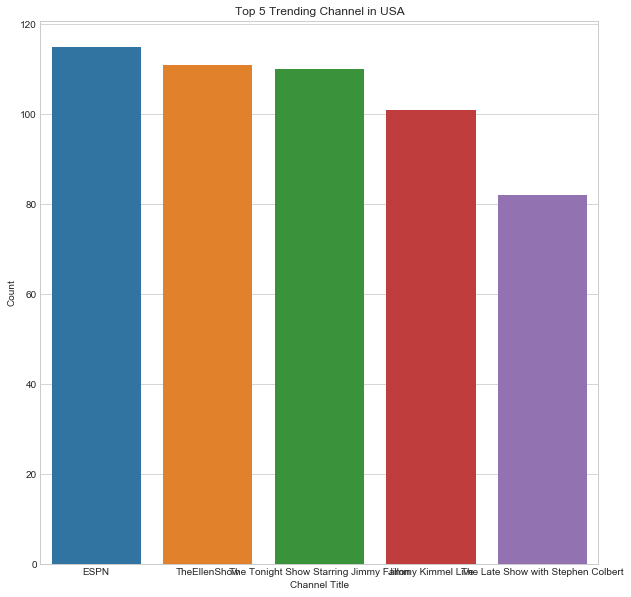

In [12]:
#Top 5 Trending Channel in USA

usa_trending_channel=df_usa_without_duplicates.groupby(by=['channel_title'],as_index=False).count().sort_values(by='title',ascending=False).head()
#as_index can be set to true or false depending on if you want the column by which you grouped to be the index of the output

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=usa_trending_channel['channel_title'],y=usa_trending_channel['video_id'], data=usa_trending_channel)
plt.xlabel("Channel Title")
plt.ylabel("Count")
plt.title("Top 5 Trending Channel in USA")

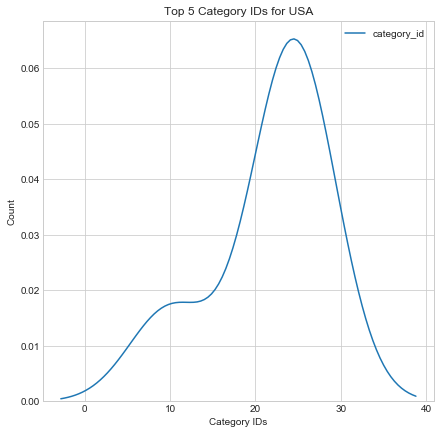

In [13]:
#Top 5 USA_Category_IDs

usa_category_id=df_usa_without_duplicates.groupby(by=['category_id'],as_index=False).count().sort_values(by='title',ascending=False).head(5)

plt.figure(figsize=(7,7))
sns.kdeplot(usa_category_id['category_id']);
plt.xlabel("Category IDs")
plt.ylabel("Count")
plt.title("Top 5 Category IDs for USA")

In [14]:
#Defining function for wordcloud

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

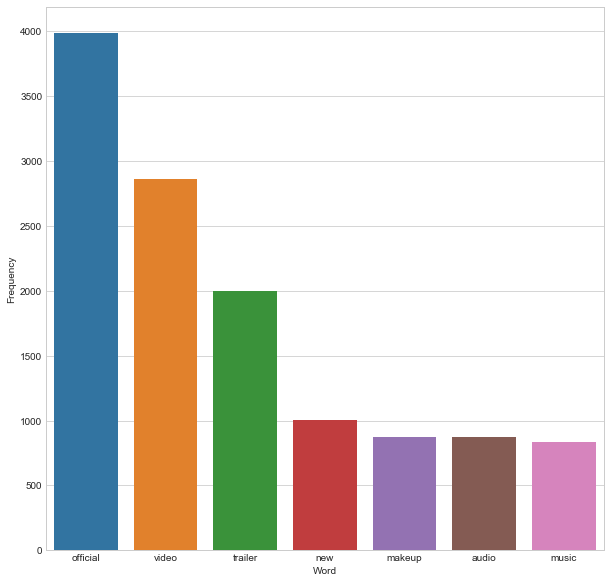

In [15]:
#To Count the frequency of words in Title column.

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = df_usa['title'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

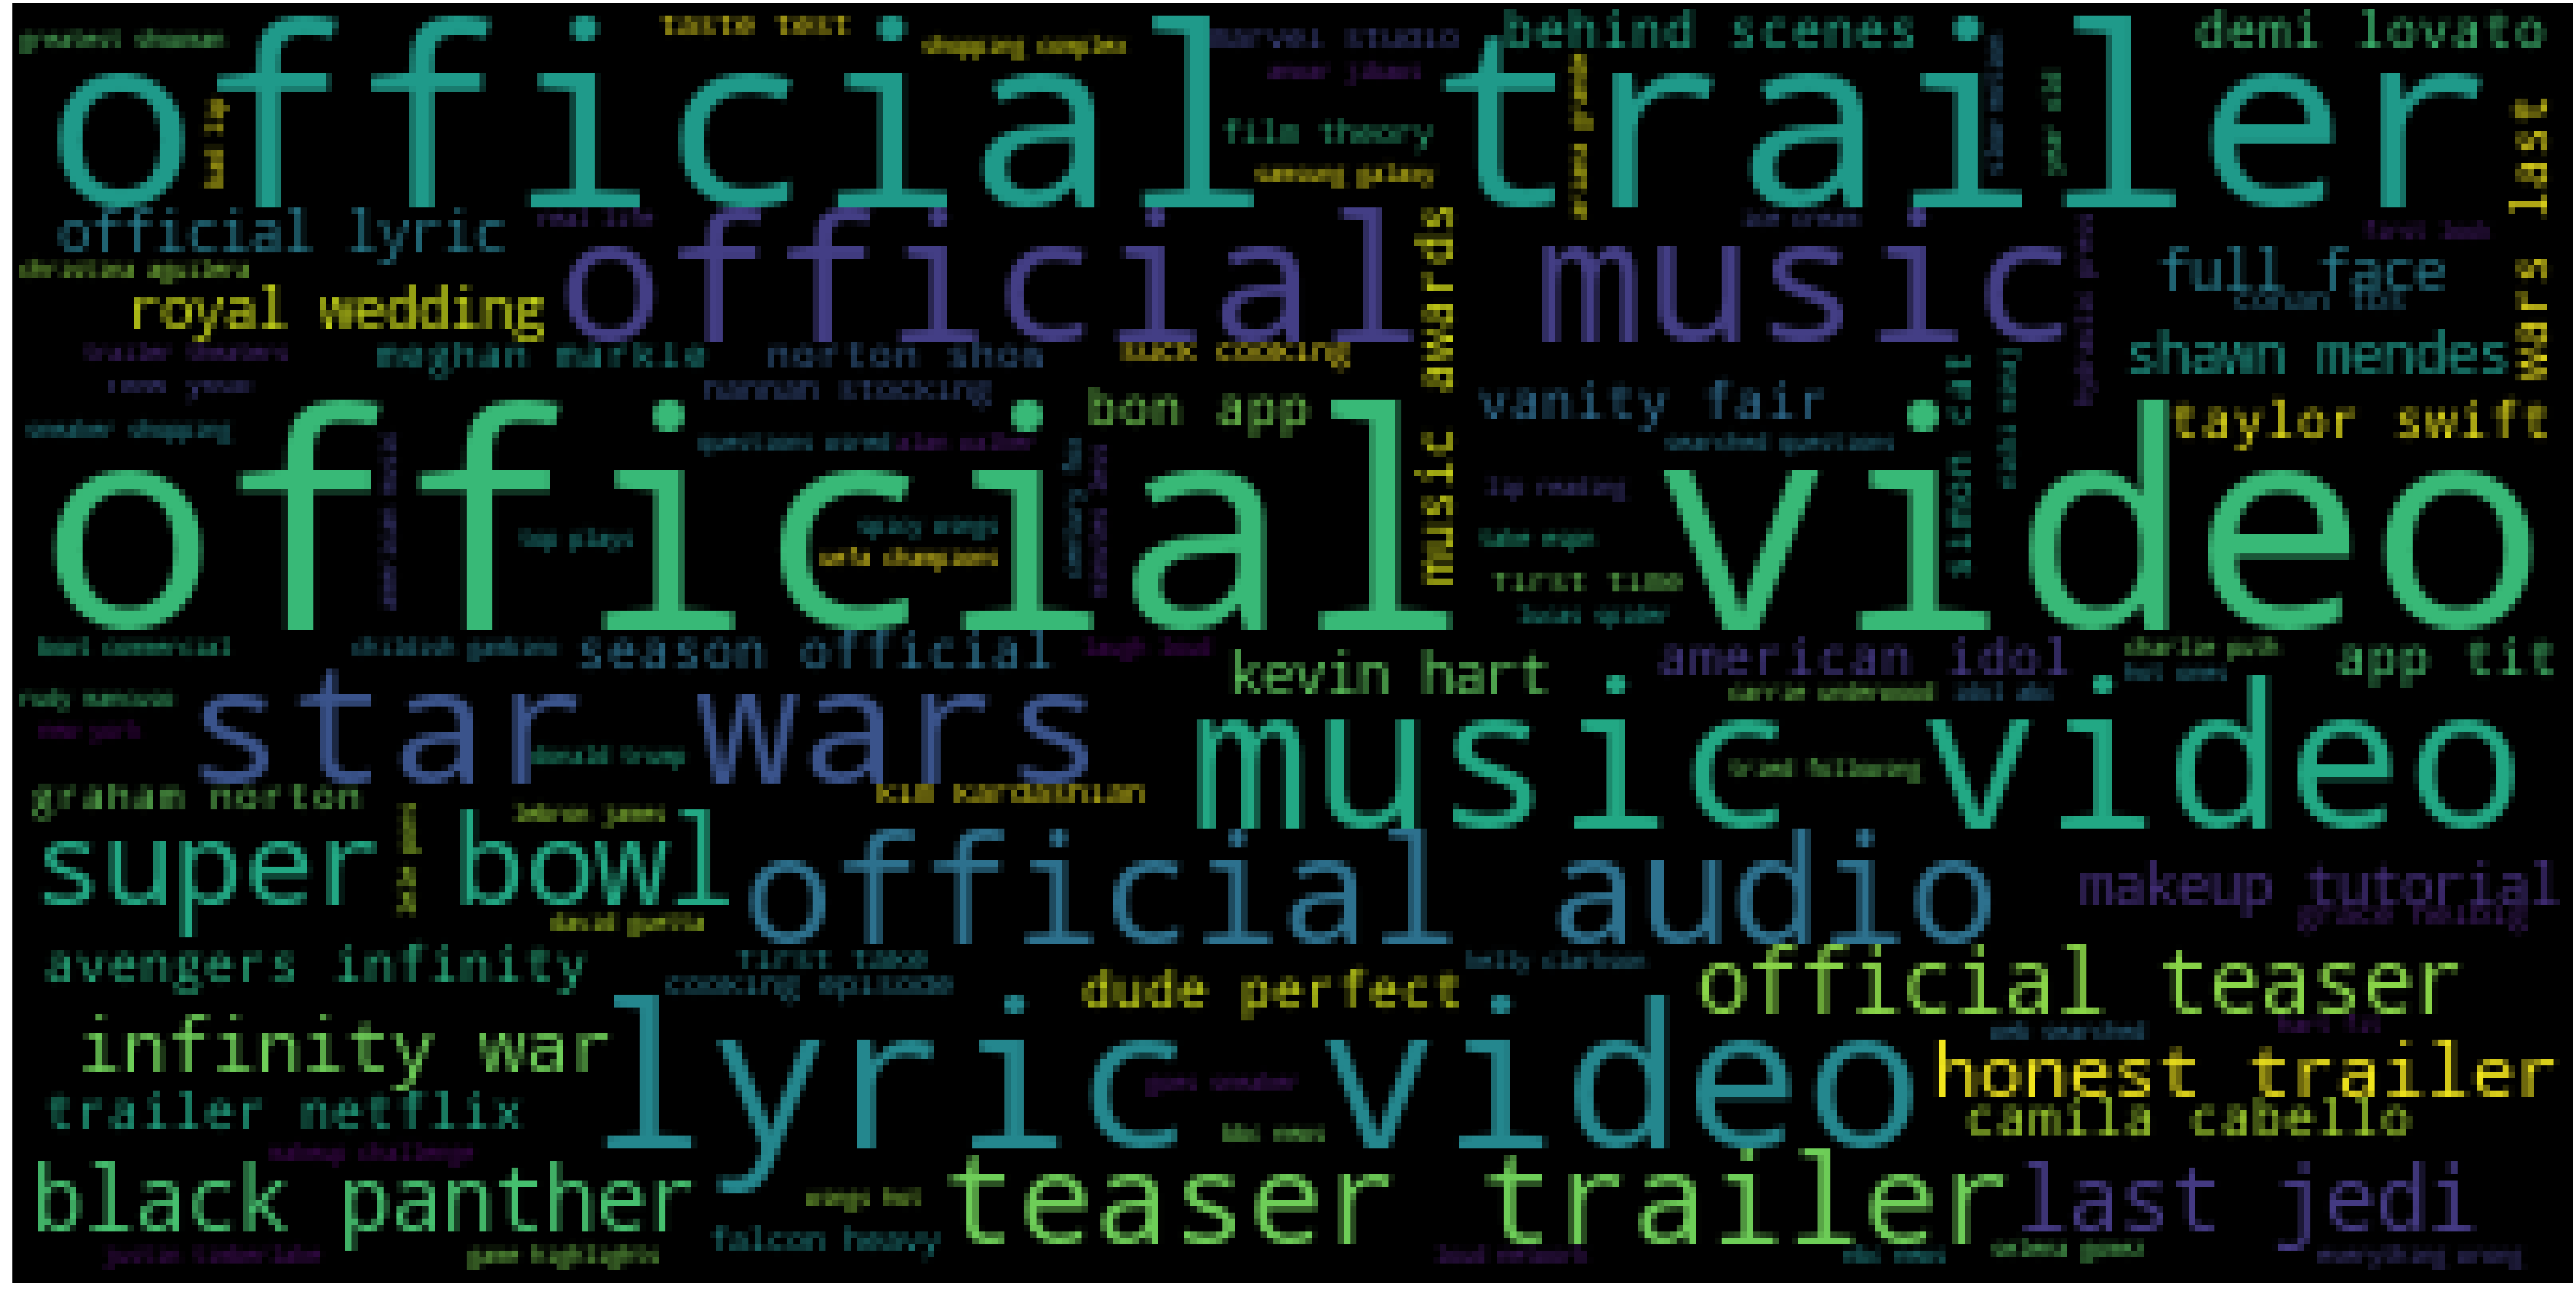

In [16]:
#WordCloud for Title Column

wc(cleaned_data_title,'black','Common Words' )

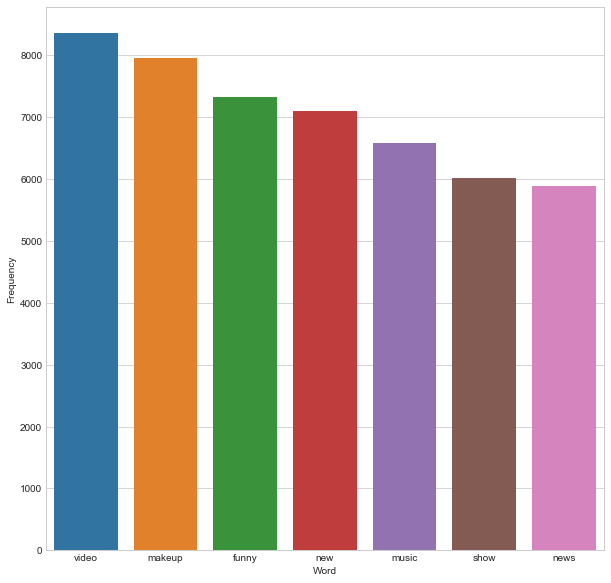

In [17]:
#To Count the frequency of words in Tags column.

from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

tags_lower = df_usa['tags'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
tags_remove_pun = re.sub('[^A-Za-z]+', ' ', tags_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_tags = word_tokenize(tags_remove_pun)
filtered_sentence_tags = [w_tags for w_tags in word_tokens_tags if not w_tags in stop_words]
filtered_sentence_tags = []
for w_tags in word_tokens_tags:
    if w_tags not in stop_words:
        filtered_sentence_tags.append(w_tags)

# Remove characters which have length less than 2  
without_single_chr_tags = [word_tags for word_tags in filtered_sentence_tags if len(word_tags) > 2]

# Remove numbers
cleaned_data_tags = [word_tags for word_tags in without_single_chr_tags if not word_tags.isnumeric()]        

# Calculate frequency distribution
word_dist_tags = nltk.FreqDist(cleaned_data_tags)
rslt_tags = pd.DataFrame(word_dist_tags.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt_tags.head(7))

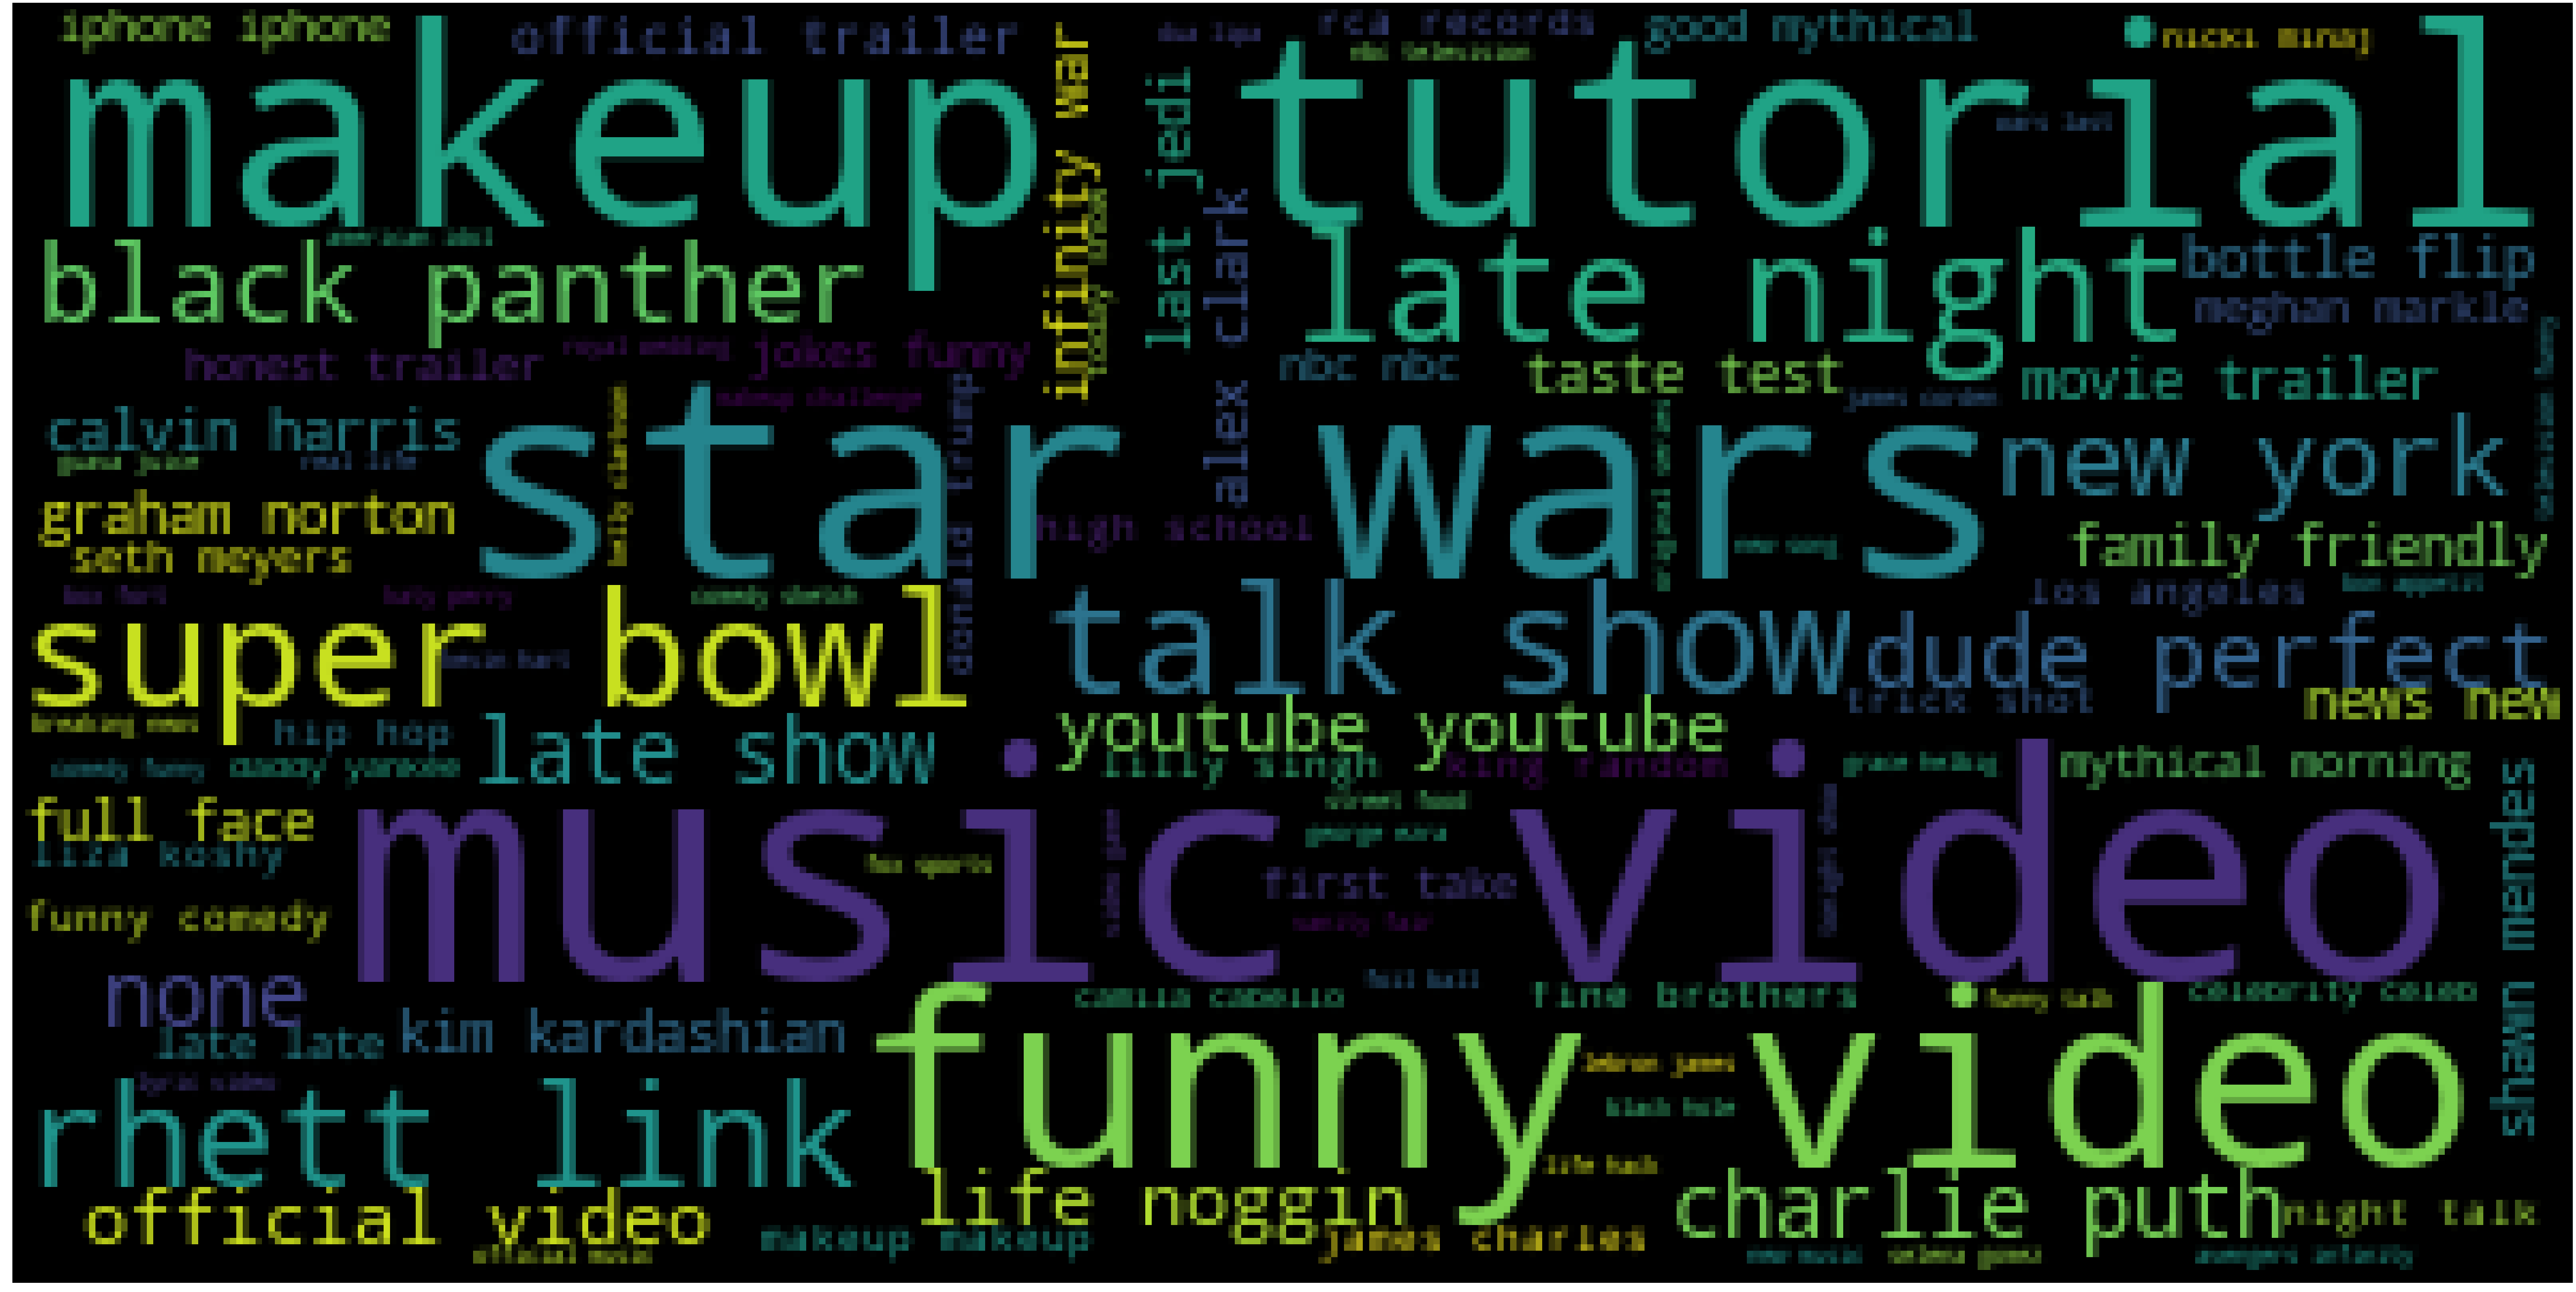

In [18]:
#WordCloud for Tags

wc(cleaned_data_tags,'black','Common Words' )

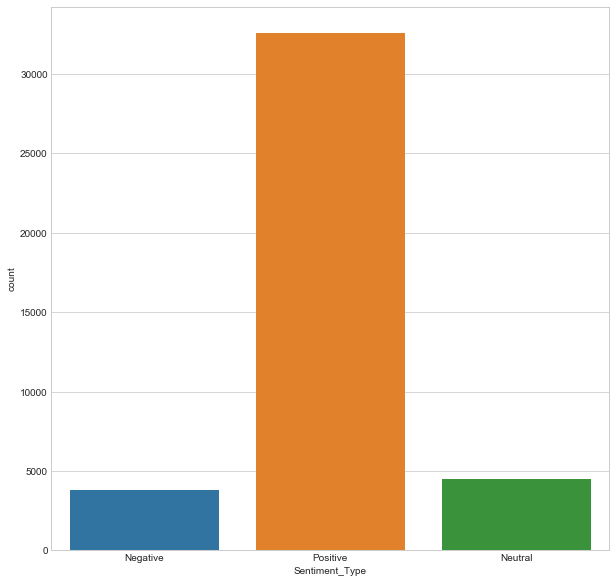

In [19]:
#Categorize the Description column into Positive and Negative sentiments using TextBlob
#The sentiment function of textblob returns two properties, polarity, and subjectivity.
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1].

from textblob import TextBlob

bloblist_desc = list()

df_usa_descr_str=df_usa['description'].astype(str)#When converting a pandas Series object to type string using astype(str)
for row in df_usa_descr_str:
    blob = TextBlob(row)#helps to tokenize the words
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
def f(df_usa_polarity_desc):
    if df_usa_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_desc['Sentiment_Type'] = df_usa_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_desc)

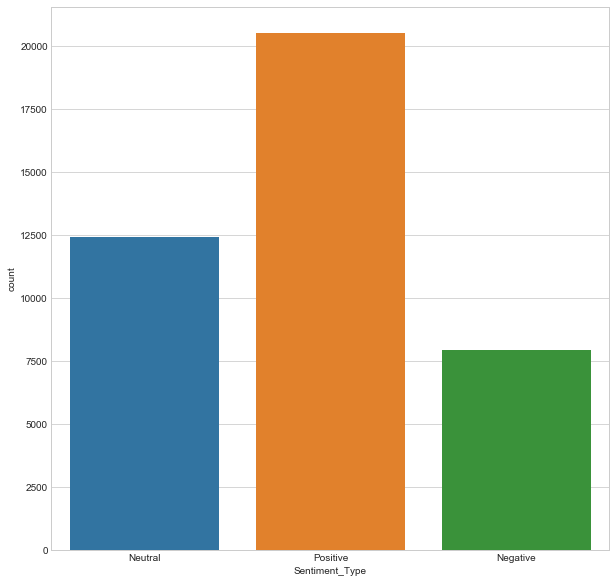

In [20]:
#Categorize the Tags column into Positive and Negative sentiments using TextBlob

from textblob import TextBlob

bloblist_tags = list()

df_usa_tags_str=df_usa['tags']
for row in df_usa_tags_str:
    blob = TextBlob(row)#helps to tokenize the words
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)

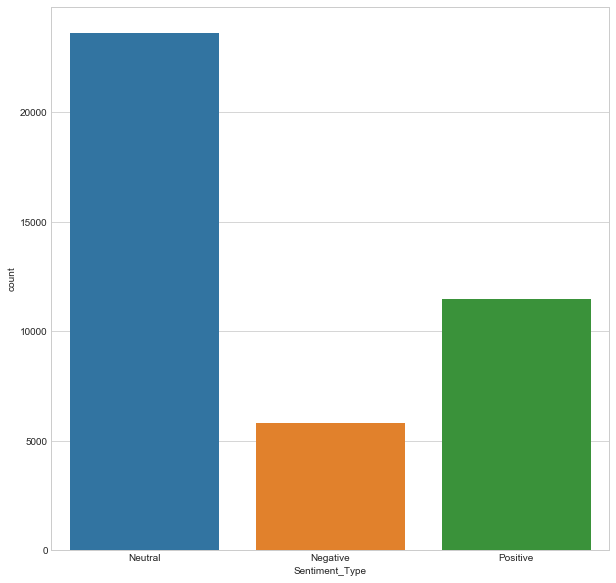

In [21]:
#Categorize the Title column into Positive and Negative sentiments using TextBlob

from textblob import TextBlob

bloblist_title = list()

df_usa_title_str=df_usa['title']
for row in df_usa_title_str:
    blob = TextBlob(row)#helps to tokenize the words
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(df_usa_polarity_title):
    if df_usa_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_title['Sentiment_Type'] = df_usa_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_title)